<h1>Table of Contents<span class="tocSkip"></span></h1>


# Introduction
<hr style="border:2px solid black"> </hr>


**What?** Two Pointers Approach 



# What is it?
<hr style="border:2px solid black"> </hr>


- This approach optimizes the runtime by utilizing some order (not necessarily sorting) of the data. It is generally applied on lists (arrays) and linked lists. 
- This is generally used to search pairs in a sorted array.
- This approach works in constant space.



# Three main steps
<hr style="border:2px solid black"> </hr>


- **Pointer Initialization** — Starting points. Pointers can be at any place depending upon what we are trying to achieve. In the left part of the pic, we have both pointers starting at the same position i.e. start of the linked list. In the right part of the pic, we have pointers at extreme ends one at starting index and another one at the last index.

- **Pointer movement** — This will decide how we converge towards the solution. Pointer can move in the same direction (left in above pic) or they can move in the opposite direction (right in the above pic). Also in the left part of the pic, we have different increments for the pointers(top (slow) with 1 unit bottom (fast) with 2 units).

- **Stop condition** — This decides when do we stop. In the left part, we continue till we reach a node whose next element is None. In the right one, we continue till our start is less than the end (i <j).



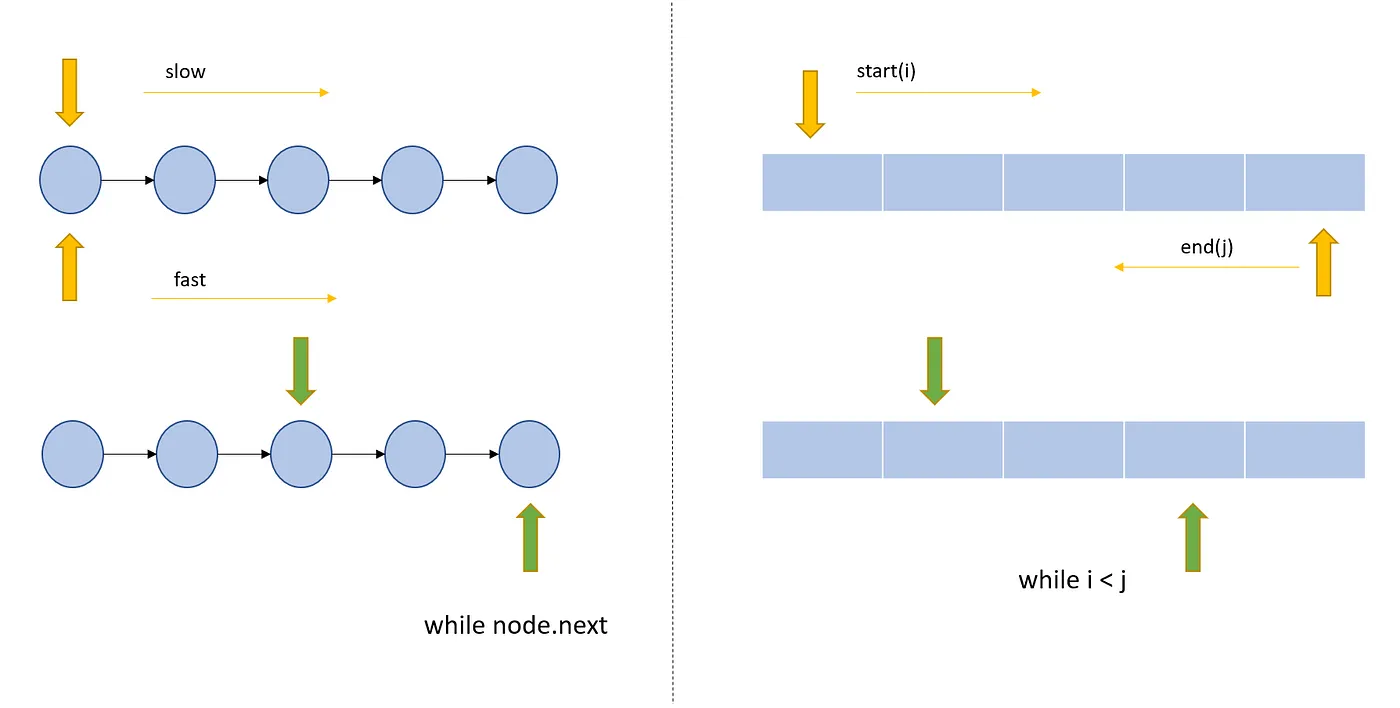

# Two pointer vs. sliding window
<hr style="border:2px solid black"> </hr>


- Sliding window is another variant of two pointer approach.



# Problem #1
<hr style="border:2px solid black"> </hr>


- Reverse an array in place. 
- In place means you are not allowed to make a copy or create an empty array; you should use the initial array.



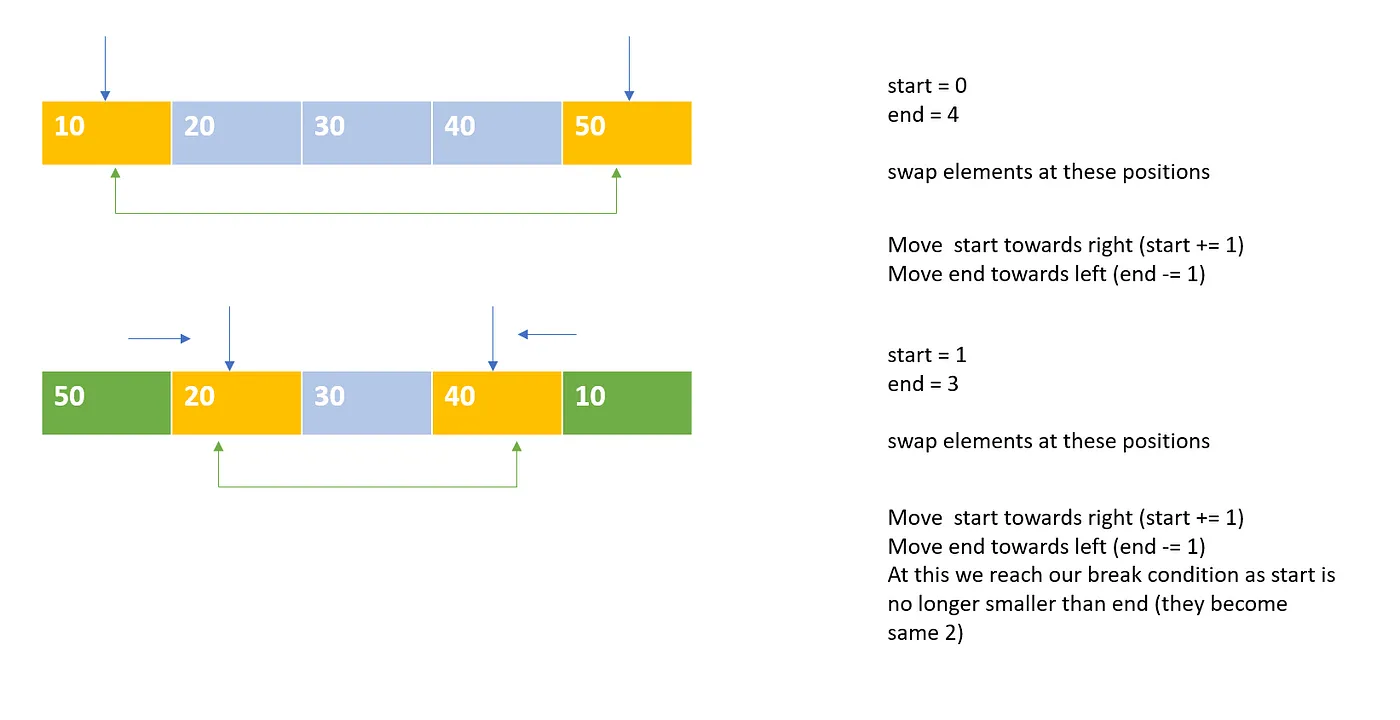

In [5]:
def reverseArray(array):
    start, end = 0, len(array)-1
    while start< end:
        array[start], array[end] = array[end] , array[start]
        start += 1
        end -= 1

In [6]:
array = [10, 20, 30, 40, 50]
reverseArray(array)
print(array)

[50, 40, 30, 20, 10]


In [9]:
# This what would normally do
array = [10, 20, 30, 40, 50]
array[::-1]

[50, 40, 30, 20, 10]

# Problem #2
<hr style="border:2px solid black"> </hr>


- Given an integer array sorted in non-decreasing order, return an array of the squares of each number sorted in non-decreasing order.
- Look that if there are negative number, you cannot simply squared and leave in the same position!



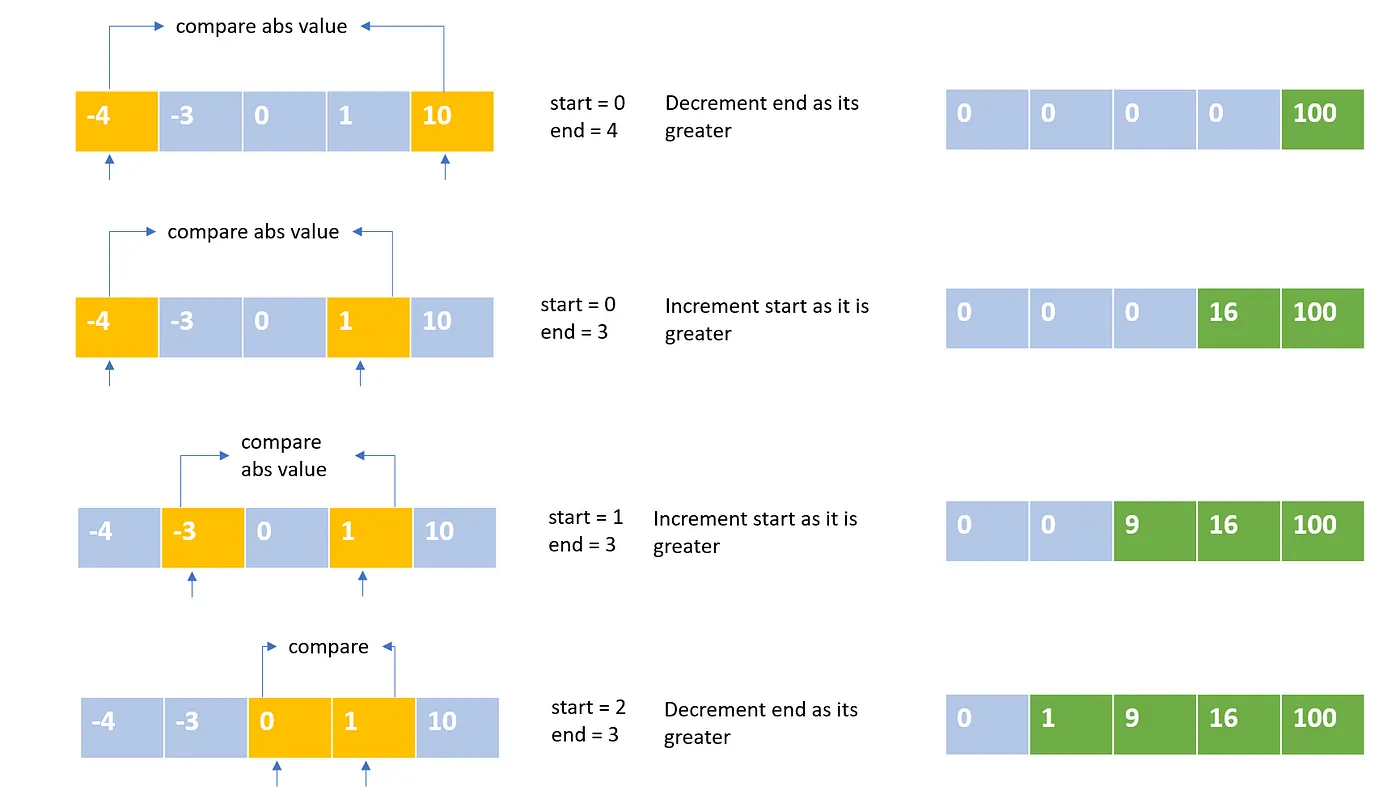

In [10]:
def sortedSquares(nums):
    n = len(nums)
    start, end = 0, n-1
    res = [0]*n
    idx = n-1

    while end > -1 and idx > -1:
        if abs(nums[start]) > abs(nums[end]):
            res[idx] = nums[start] * nums[start]
            start += 1
        else:
            res[idx] = nums[end] * nums[end]
            end -= 1
        idx -= 1

    return res

In [12]:
array = [-4,-3,0,1,10]
sortedSquares(array)

[0, 1, 9, 16, 100]

In [14]:
# you could also solved the same problem like this
sorted(np.array([-4,-3,0,1,10])**2)

[0, 1, 9, 16, 100]

# Problem #3
<hr style="border:2px solid black"> </hr>


- Finding cycle in Linked list.
- Note that we are not sorting of nodes.



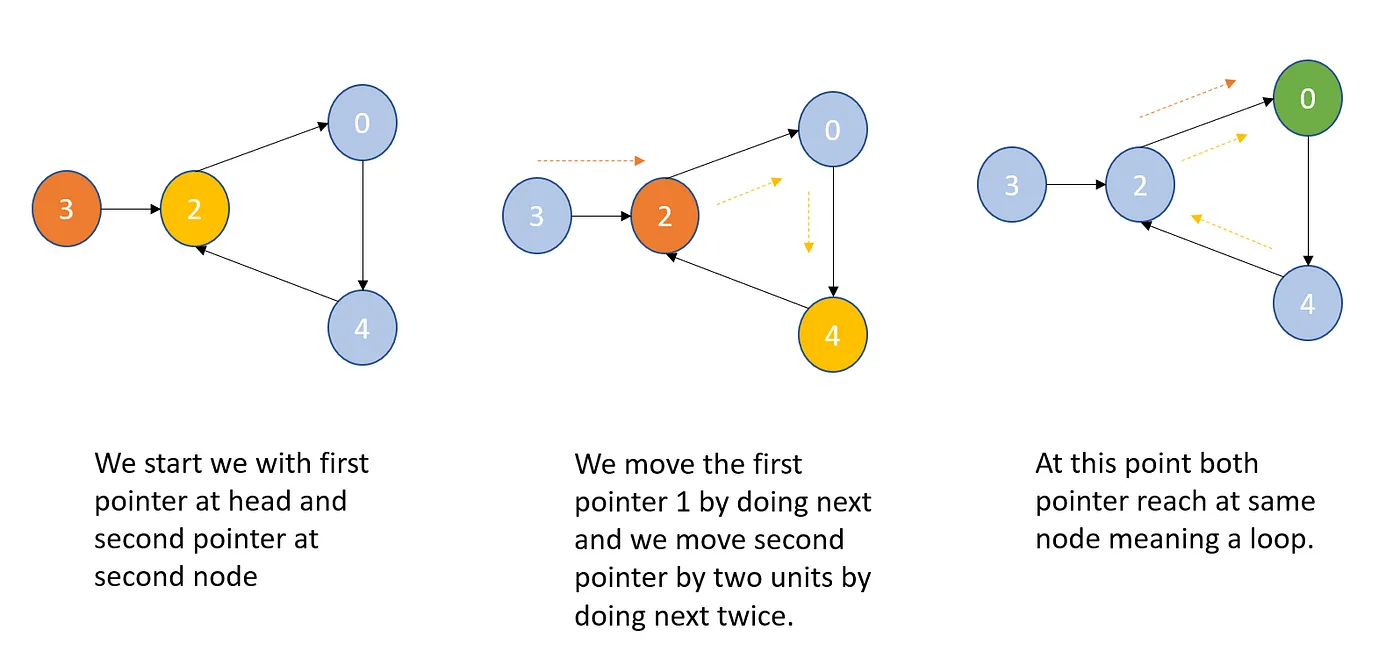

In [17]:
class ListNode:
    """Create a linked list class
    """
    def __init__(self, x):
        self.val = x
        self.next = None
    
    def __repr__(self):
        return str(self.val)

In [20]:
# Create a linked list
lt = [ListNode(item) for item in [3, 2, 0, -4]]

In [21]:
lt

[3, 2, 0, -4]

In [22]:
def hasCycle(head):

    if not head or not head.next:
        return False

    p1 = head
    p2 = head.next

    while p2:
        p2 = p2.next
        if p2:
            p2 = p2.next
        if not p2:
            return False

        p1 = p1.next

        if p1 == p2:
            return True

In [23]:
head = lt[0]
head.next = lt[1]
lt[1].next= lt[2]
lt[2].next = lt[3]
lt[3].next = lt[1]
    
print(hasCycle(head))

True


# Problem #4
<hr style="border:2px solid black"> </hr>


- Given a string `s`, find the length of the longest substring without repeating characters.



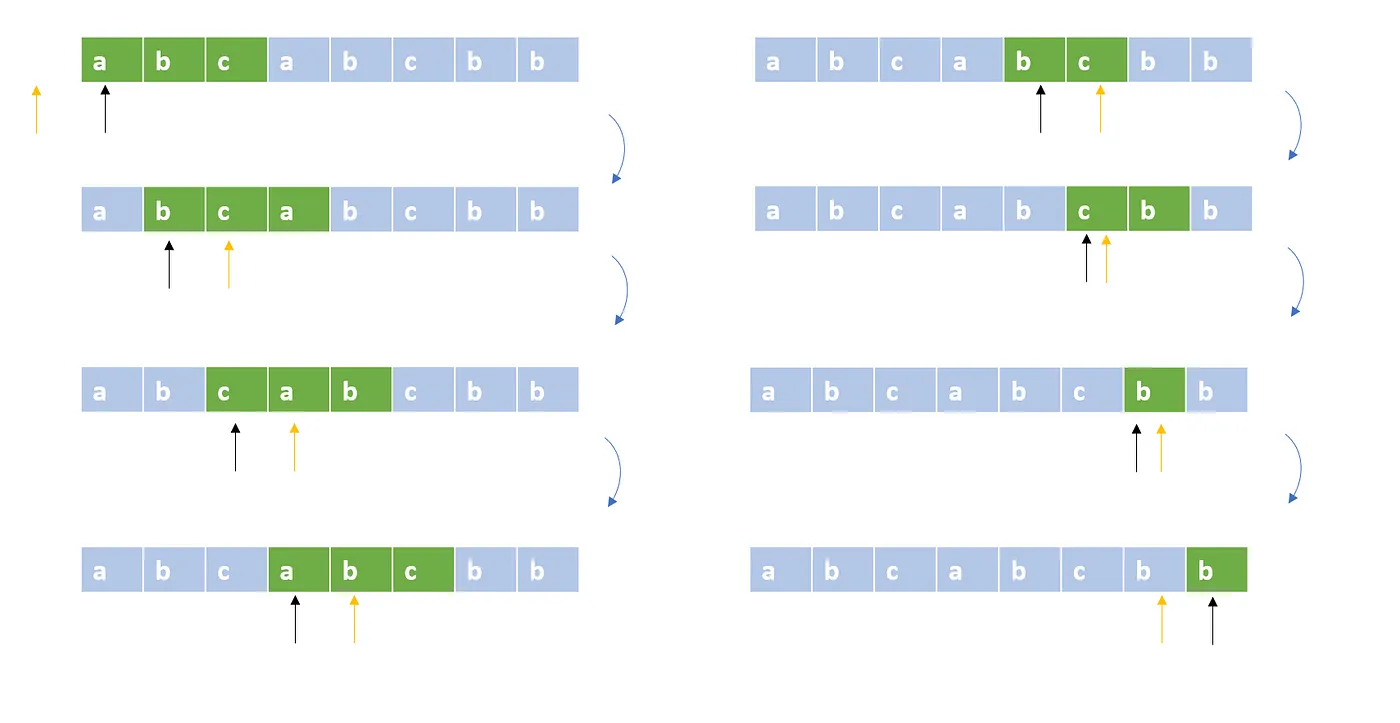

In [25]:
def lengthOfLongestSubstring(s):
    seen, n = set(), len(s)
    right, res = -1, 0
    for left in range(n):
        print(left, right, s[left: right+1], seen)
        while right + 1 < n and s[right+1] not in seen:
            right += 1
            seen.add(s[right])
        res = max(res, right - left + 1)
        print(s[left: right+1])
        if right == n - 1:
            break
        seen.discard(s[left])
    return res

In [26]:
print(lengthOfLongestSubstring("abcabcbb"))

0 -1  set()
abc
1 2 bc {'b', 'c'}
bca
2 3 ca {'a', 'c'}
cab
3 4 ab {'b', 'a'}
abc
4 5 bc {'b', 'c'}
bc
5 5 c {'c'}
cb
6 6 b {'b'}
b
7 6  set()
b
3


# Problem #5
<hr style="border:2px solid black"> </hr>


- Given three sorted arrays A, B, and C of not necessarily the same sizes.
- Calculate the minimum absolute difference between the maximum and minimum number of any triplet A[i], B[j], C[k] such that they belong to arrays A, B and C respectively, i.e., minimize (max(A[i], B[j], C[k]) — min(A[i], B[j], C[k]))



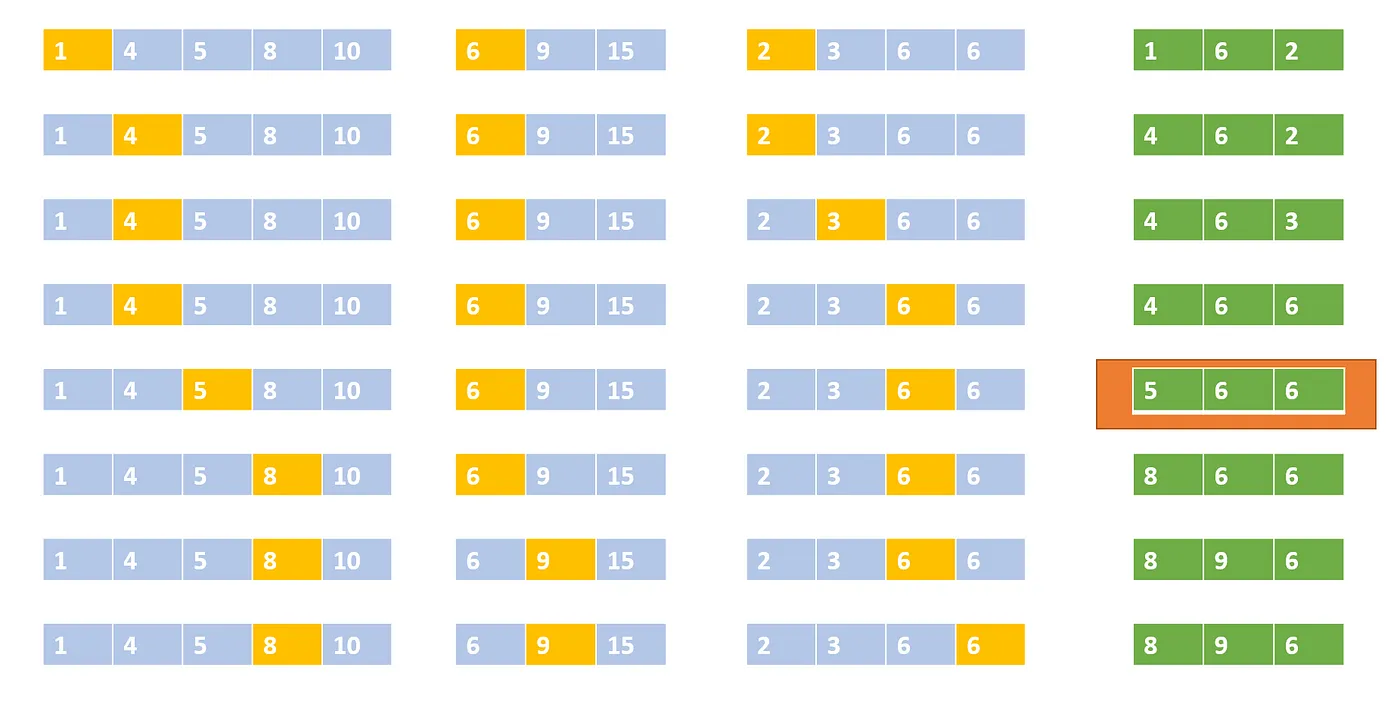

In [28]:
def solve(A, B, C):
    i, j, k = 0, 0, 0
    m, n, p = len(A), len(B), len(C)
    min_diff = abs(max(A[i], B[j], C[k]) - min(A[i], B[j], C[k]))
    while i < m and j < n and k < p:
        curr_diff = abs(max(A[i], B[j], C[k])-min(A[i], B[j], C[k]))
        if curr_diff < min_diff:
            min_diff = curr_diff
        min_term = min(A[i], B[j], C[k])
        if A[i] == min_term:
            i += 1
        elif B[j] == min_term:
            j += 1
        else:
            k += 1
    return min_diff

In [29]:
A = [1, 4, 5, 8, 10]
B = [6,9,15]
C = [2,3,6,6]
print(solve(A, B, C))

1


# Problem #6
<hr style="border:2px solid black"> </hr>


- Given n non-negative integers a1, a2, ..., an , where each represents a point at coordinate (i, ai). n vertical lines are drawn such that the two endpoints of the line i is at (i, ai) and (i, 0).
- Find two lines, which, together with the x-axis forms a container, such that the container contains the most water.
- This technique can be extended to more than two pointers.



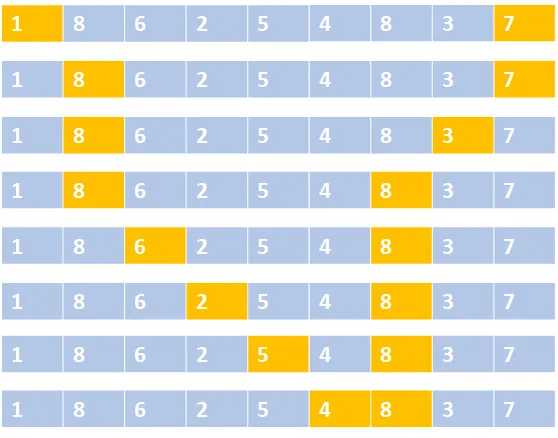

In [30]:
def maxArea(height):
    l, r, max_area = 0, len(height)-1, 0
    while l < r:
        base = r-l
        if height[r] >= height[l]:
            h = height[l]
            l += 1
        else:
            h = height[r]
            r -= 1
        print(l, r)
        if h * base > max_area:
            max_area = h * base
    return max_area

# Problem #7
<hr style="border:2px solid black"> </hr>


- Given three integer arrays arr1, arr2 and arr3 sorted in strictly increasing order, return a sorted array of only the integers that appeared in all three arrays.
- We start with three-pointers and increase the ones that are smaller than max of three elements.



In [ ]:
def arraysIntersection(arr1, arr2, arr3):
    i, j, k = 0, 0, 0
    p, q, r = len(arr1), len(arr2), len(arr3)
    res = []
    while i < p and j < q and k < r:
        if arr1[i] == arr2[j] == arr3[k]:
            res.append(arr1[i])
            i += 1
            j += 1
            k += 1
            continue min_next_possible = max(arr1[i], arr2[j], arr3[k]) if arr1[i] < min_next_possible:
            i += 1
        if arr2[j] < min_next_possible:
            j += 1
        if arr3[k] < min_next_possible:
            k += 1
    return res

# References
<hr style="border:2px solid black"> </hr>


- [Two Pointers Approach — Python Code](https://towardsdatascience.com/two-pointer-approach-python-code-f3986b602640)
- [Linked list](https://github.com/kyaiooiayk/Python-Programming/blob/main/tutorials/Data-Structures/tutorials/Linked%20lists.ipynb)

